# G2M Insight for Cab Investment Firm
#### Author: Benjamin Prud'homme

## Step 1: Import, Understand, and Merge Datasets

### 1.1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### 1.2: Import datasets

In [2]:
# Import datasets
cab_data = pd.read_csv('Cab_Data.csv')
city_data = pd.read_csv('City.csv')
customer_data = pd.read_csv('Customer_ID.csv')
trans_data = pd.read_csv('Transaction_ID.csv') 

### 1.3: Preview and understand individual datasets

#### 1.3.a: Cab_Data

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
cab_data.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [6]:
# Change Date of Travel to have type Datetime 
temp = cab_data['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in temp]
cab_data['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [7]:
cab_data.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [8]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [9]:
cab_data['Date of Travel'].min()

Timestamp('2016-01-01 00:00:00')

In [10]:
cab_data['Date of Travel'].max()

Timestamp('2018-12-30 00:00:00')

In [11]:
cab_data['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [12]:
cab_data['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

#### 1.3.b: City

In [13]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [14]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [15]:
# Change Population and Users to have type float
city_data['Population'] = [x.replace(',','') for x in city_data['Population']]
city_data['Population'] = city_data['Population'].astype(int)
city_data['Users'] = [x.replace(',','') for x in city_data['Users']]
city_data['Users'] = city_data['Users'].astype(int)

In [16]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [17]:
city_data.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [18]:
trans_data['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

#### 1.3.c: Transaction_ID

In [19]:
trans_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [20]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [21]:
trans_data.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


#### 1.3.d: Customer_ID

In [22]:
# Preview and understand datasets: 4) Customer Data
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [23]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [24]:
customer_data.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


### 1.4: Merge datasets into one, add features for EDA

In [25]:
# Merge data into one dataframe
full_data = cab_data.merge(city_data, on="City").merge(trans_data, on="Transaction ID").merge(customer_data, on="Customer ID")

# Additional features
age_conds = [
    (full_data["Age"] < 25),
    (full_data["Age"] >= 25) & (full_data["Age"] < 35),
    (full_data["Age"] >= 35) & (full_data["Age"] < 45),
    (full_data["Age"] >= 45) & (full_data["Age"] < 55),
    (full_data["Age"] >= 55) & (full_data["Age"] < 65),
    (full_data["Age"] >= 65)
]
age_groups = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

full_data["Profit"] = full_data["Price Charged"] - full_data["Cost of Trip"]
full_data["Day"] = full_data["Date of Travel"].dt.day
full_data["Weekday"] = full_data["Date of Travel"].dt.dayofweek
full_data["Month"] = full_data["Date of Travel"].dt.month
full_data["Year"] = full_data["Date of Travel"].dt.year
full_data['Age Group'] = np.select(age_conds, age_groups)

# Preview
full_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Day,Weekday,Month,Year,Age Group
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,57.3150,7,3,1,2016,25-34
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,281.2772,20,4,7,2018,25-34
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,194.6480,22,3,11,2018,25-34
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237,23.6660,5,1,1,2016,25-34
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237,253.9808,20,4,4,2018,25-34


In [26]:
cab_data['Transaction ID'].nunique()

359392

In [27]:
trans_data['Transaction ID'].nunique()

440098

# Step 2: Exploratory Data Analysis
#### 2.1: Correlation Heatmap

<AxesSubplot:title={'center':'Correlation Heatmap'}>

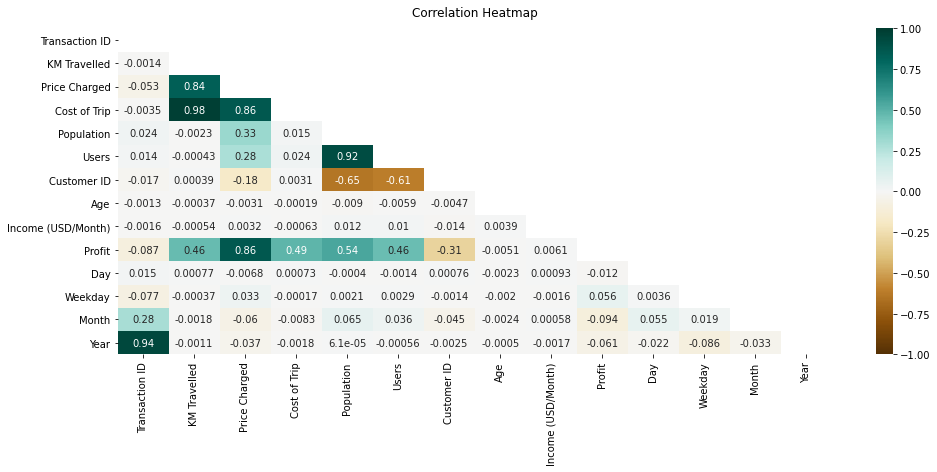

In [28]:
cor_mat = full_data.corr()
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(cor_mat, dtype=np.bool))
heatmap = sns.heatmap(cor_mat, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

heatmap

The strongest correlation exists between:

- Cost of Trip vs. KM Travelled (0.98)
- Users vs. Population (0.92)
- Cost of Trip vs. Price Charged (0.86)
- Profit vs. Price Charged (0.86)
- Price Charged vs. KM Travelled (0.84)

Moderate correlation exists between:
- Profit vs. Population (0.54)
- Profit vs. Cost of Trip (0.49)
- Profit vs. KM Travelled (0.46)
- Profit vs. Users (0.46)
- Population vs. Price Charged (0.33)
- Users vs. Price Charged (0.28)

#### 2.2: % of customers/transactions by company

In [29]:
company_data=full_data.groupby('Company')
user_count = company_data["Customer ID"].nunique()
trans_count = company_data["Transaction ID"].nunique()

user_trans_table = pd.concat([user_count, trans_count], axis=1)
user_trans_table['Customer %'] = (user_trans_table['Customer ID'] / user_trans_table['Customer ID'].sum()) * 100
user_trans_table['Transaction %'] = (user_trans_table['Transaction ID'] / user_trans_table['Transaction ID'].sum()) * 100


user_trans_table

,Customer ID,Transaction ID,Customer %,Transaction %
Company,,,,
Pink Cab,32330,84711,44.762274,23.570642
Yellow Cab,39896,274681,55.237726,76.429358


Yellow Cab is definitely the more popular company: 55.24% of customers use it, and it accounts
for 76.43% of transactions processed.

#### 2.3: Transactions by company, payment method

<AxesSubplot:title={'center':'Total Transactions by Payment Mode'}, xlabel='Company', ylabel='count'>

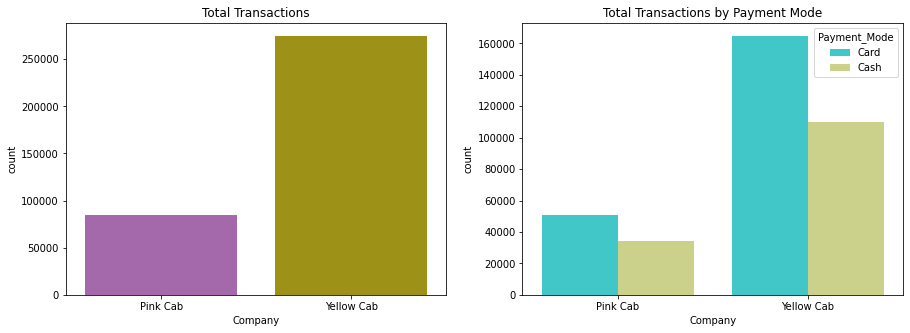

In [30]:
f = plt.figure(figsize=(15, 5))

f.add_subplot(1,2,1)
plt.title("Total Transactions")
sns.countplot(x="Company", data=full_data, palette=["#ac5eb5","#b5a300"])

f.add_subplot(1,2,2)
plt.title("Total Transactions by Payment Mode")
sns.countplot(x="Company", hue="Payment_Mode", data=full_data, palette="rainbow")

Yellow Cab has far more transactions (approximately 270,000 vs 80,000). Both companies have more card payments than cash payments; this difference is greater for Yellow Cab (approx. 50,000 vs 20,000).

#### 2.4: Transactions by company, weekday / month

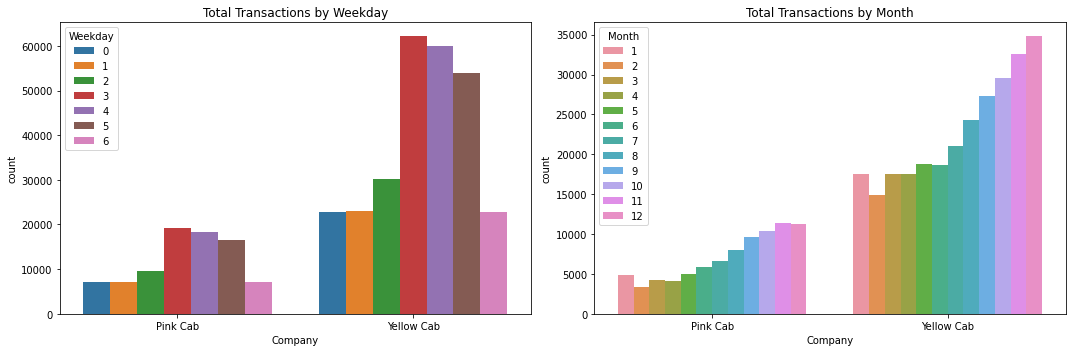

In [31]:
f = plt.figure(figsize=(15, 5))

f.add_subplot(1,2,1)
plt.title("Total Transactions by Weekday")
sns.countplot(x="Company", hue="Weekday", data=full_data)

f.add_subplot(1,2,2)
plt.title("Total Transactions by Month")
sns.countplot(x="Company", hue="Month", data=full_data)

f.tight_layout()

Both companies get a lot more service on Thursdays, Fridays, and Saturdays than on other days. Also, they both experience a similar annual trend: service is lowest in February, and then increases steadily throughout the rest of the year, with December having the most transactions.

#### 2.5: Population vs. users per city

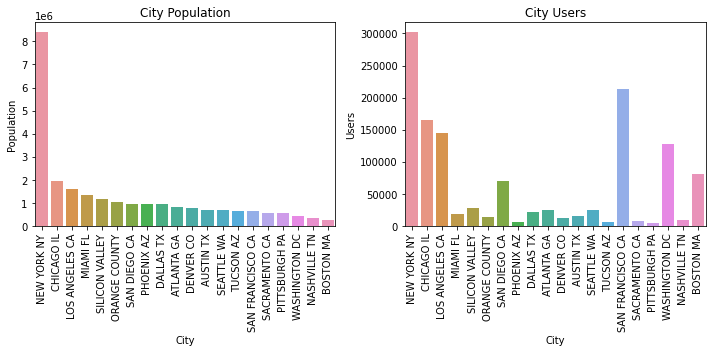

In [32]:
f = plt.figure(figsize=(10,5))

# Population of cities
f.add_subplot(1,2,1)
plt.title("City Population")
sns.barplot(x="City", y="Population", data=city_data)
plt.xticks(rotation=90)

# Users in each city
f.add_subplot(1,2,2)
plt.title("City Users")
sns.barplot(x="City", y="Users", data=city_data)
plt.xticks(rotation=90)

f.tight_layout()

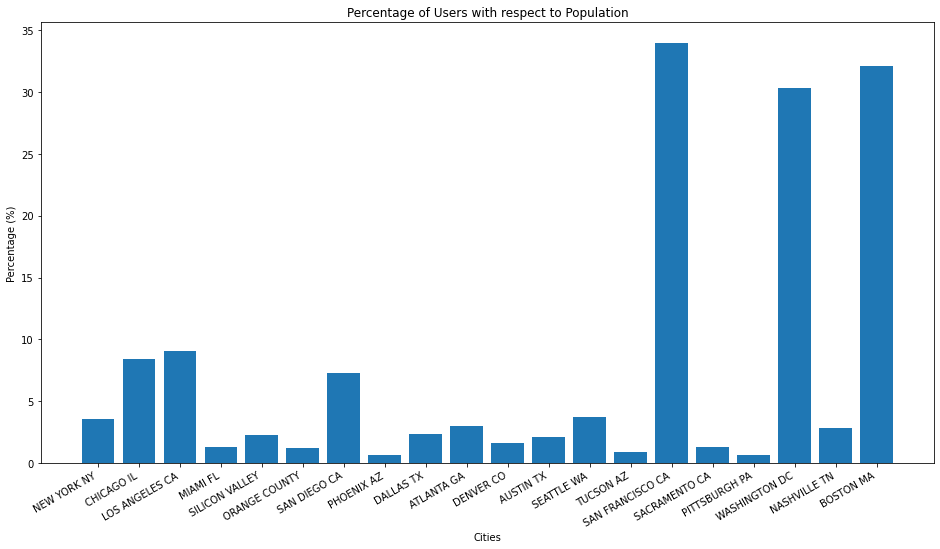

In [33]:
city = city_data['City']
user_pct = (city_data['Users']/city_data['Population'])*100

f = plt.figure(figsize = (16, 9))
plt.bar(city, user_pct)
plt.gcf().autofmt_xdate()
plt.title('Percentage of Users with respect to Population')
plt.ylabel('Percentage (%)')
plt.xlabel('Cities')
plt.show()

Although New York has the most people and users, its massive population gives it a low user percentage. Also with large numbers of users are Chicago, Los Angeles, San Francisco, Washington DC, and Boston - the latter three of which have high user percentages (30% and up).

#### 2.6: Profit

##### 2.6.a: Box plot

/Users/benjaminprudhomme/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


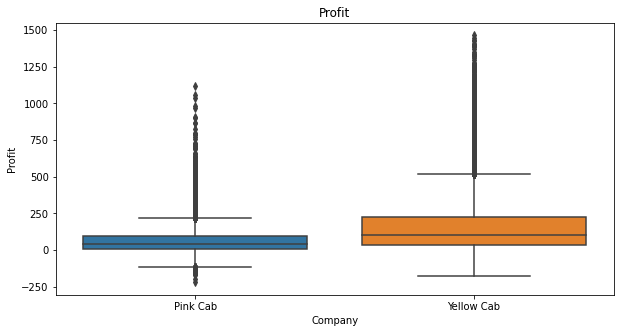

In [34]:
plt.figure(figsize = (10, 5))

sns.boxplot(full_data['Company'], full_data['Profit'])
plt.title('Profit')
plt.show()

On average, Yellow Cab brings in slightly higher profits (about 150 vs 50 dollars).

##### 2.6.b: Profit per year/month

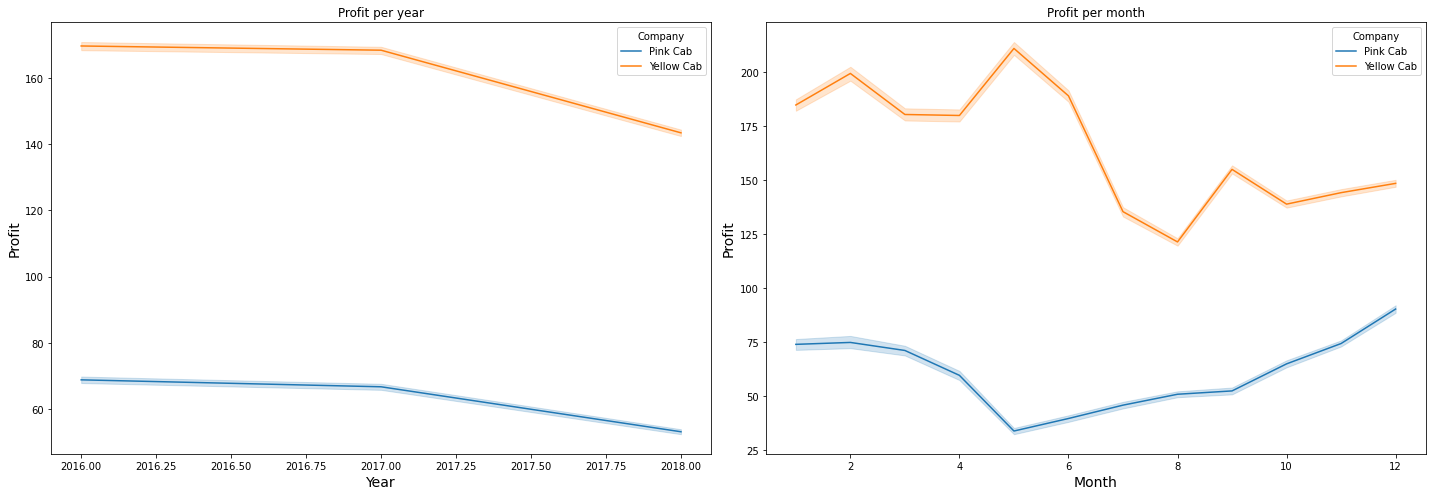

In [35]:
f = plt.figure(figsize=(20,7))

f.add_subplot(1, 2, 1)
sns.lineplot(x='Year', y='Profit', hue="Company", data=full_data)
plt.xlabel("Year", size=14)
plt.ylabel("Profit", size=14)
plt.title("Profit per year")

f.add_subplot(1, 2, 2)
sns.lineplot(x='Month', y='Profit', hue="Company", data=full_data)
plt.xlabel("Month", size=14)
plt.ylabel("Profit", size=14)
plt.title("Profit per month")

f.tight_layout()

Profits for both companies have declined from 2016 to 2018. Month-wise, Pink Cab brings in higher profits at the ends of the year (Q1, Q4), while Yellow Cab brings in higher profits in the first half of the year (Q1, Q2). However, Yellow Cab's profits are consistently higher than those of Pink Cab. 

#### 2.7: Profit by trip length

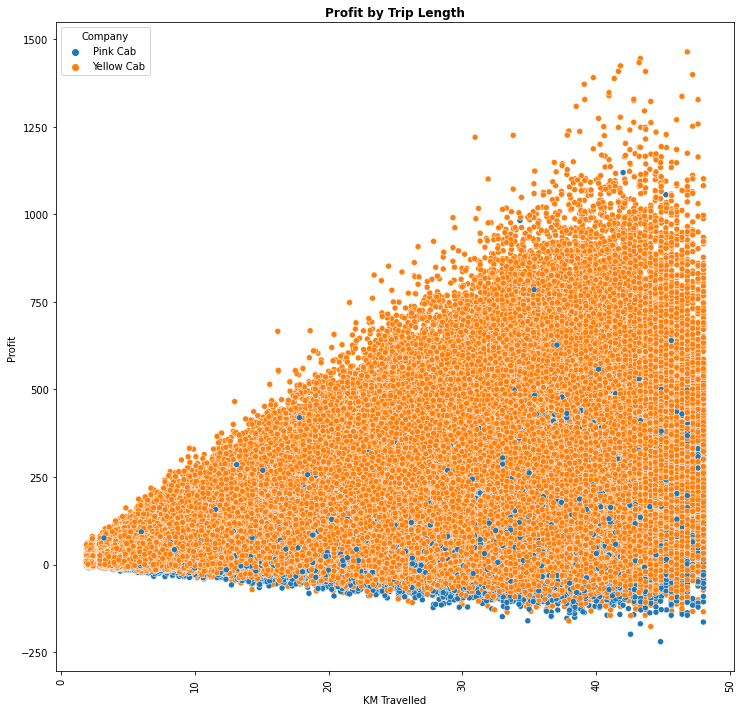

In [36]:
f = plt.figure(figsize=(20,10))

f.add_subplot(1,2,1)
plt.title("Profit by Trip Length",fontweight='bold')
sns.scatterplot(x="KM Travelled", y="Profit", hue="Company", data=full_data)
plt.xticks(rotation=90)

f.tight_layout()

There appears to be a loosely linear relationship between KM travelled and profit.
Yellow Cab's profits are slightly higher than those of Pink Cab.

#### 2.8: Company/gender percentages

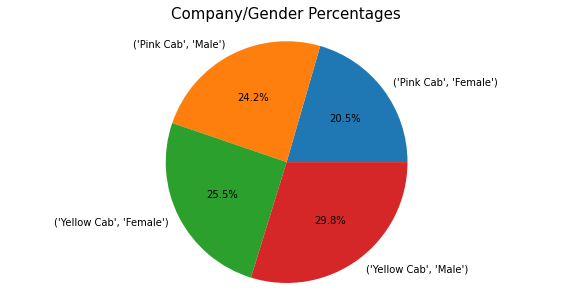

In [37]:
gender_data = full_data.groupby(["Company", "Gender"])
gender_data = gender_data['Customer ID'].nunique()

labs = gender_data.index
vals = gender_data.values
figp, axp = plt.subplots(figsize=(10,5))
axp.pie(vals, labels=labs, autopct='%1.1f%%')
axp.axis('equal')

plt.title('Company/Gender Percentages', fontsize = 15)
plt.show()

Overall gender percentages: 54% male, 46% female. The company gender percentages match up closely with the overall percentages.

##### 2.8.b: Profit by Gender

<AxesSubplot:title={'center':'Profit by Gender'}, xlabel='Company', ylabel='Profit'>

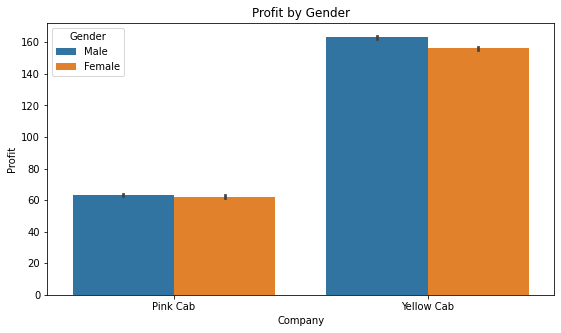

In [38]:
f = plt.figure(figsize=(20,5))

f.add_subplot(1,2,1)
plt.title("Profit by Gender")
sns.barplot(x="Company", y="Profit", hue="Gender", data=full_data)

#### 2.9: Age

##### 2.9.a: Boxplot

/Users/benjaminprudhomme/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


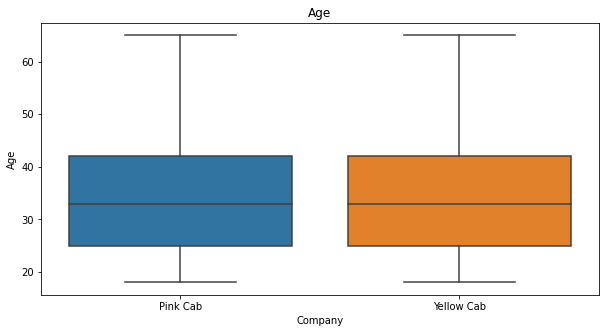

In [39]:
plt.figure(figsize = (10, 5))

sns.boxplot(full_data['Company'], full_data['Age'])
plt.title('Age')
plt.show()

The age distributions are nearly identical for the two companies. 75% of riders are ~42 years old or younger.

##### 2.9.b: Profit by Age Group

<AxesSubplot:title={'center':'Profit by Age Group'}, xlabel='Company', ylabel='Profit'>

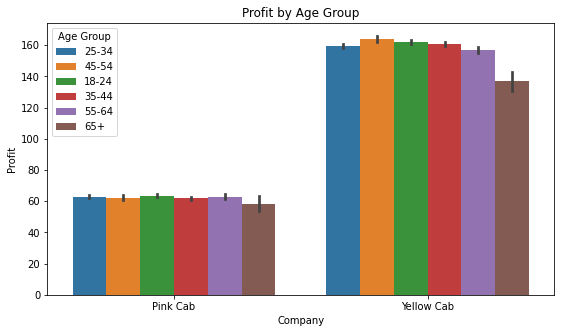

In [40]:
f = plt.figure(figsize=(20,5))

# Population of cities
f.add_subplot(1,2,1)
plt.title("Profit by Age Group")
sns.barplot(x="Company", y="Profit", hue="Age Group", data=full_data)

All age groups bring in about the same profit for Pink Cab (around 60 dollars). All age groups bring in about 160 dollars in profits for Yellow Cab, except those over 65 (closer to $135). Perhaps Yellow Cab gives discounts to senior citizens on their rides.

Pink Cab's profits are very close to each other for men and women. Yellow Cab's profits are about $5 more for men than they are for women.

# 3. Hypothesis Testing

#### 3.1: Profit vs. Gender

##### Pink Cab

In [41]:
a = full_data[(full_data.Gender=='Female')&(full_data.Company=='Pink Cab')].groupby('Transaction ID')["Profit"].mean()
b = full_data[(full_data.Gender=='Male')&(full_data.Company=='Pink Cab')].groupby('Transaction ID')["Profit"].mean()
_, pval = stats.ttest_ind(a.values, b.values, equal_var=True)
pval

0.11515305900425798

The difference in Pink Cab's profits between men and women is NOT statistically significant.

##### Yellow Cab

In [42]:
a = full_data[(full_data.Gender=='Female')&(full_data.Company=='Yellow Cab')].groupby('Transaction ID')["Profit"].mean()
b = full_data[(full_data.Gender=='Male')&(full_data.Company=='Yellow Cab')].groupby('Transaction ID')["Profit"].mean()
_, pval = stats.ttest_ind(a.values, b.values, equal_var=True)
pval

6.060473042494144e-25

The difference in Pink Cab's profits between men and women IS statistically significant (higher for men than for women, as we saw in the bar graph above).

#### 3.2: Profit vs. Age
We'll check for a statistically significant difference in profits between users under or over 65.

##### Pink Cab

In [43]:
a = full_data[(full_data.Age>=65)&(full_data.Company=='Pink Cab')].groupby('Transaction ID')["Profit"].mean()
b = full_data[(full_data.Age<65)&(full_data.Company=='Pink Cab')].groupby('Transaction ID')["Profit"].mean()
_, pval = stats.ttest_ind(a.values, b.values, equal_var=True)
pval

0.1249239243248965

The difference in Pink Cab's profits between people under and over the age of 65 is NOT statistically significant.

##### Yellow Cab

In [44]:
a = full_data[(full_data.Age>=65)&(full_data.Company=='Yellow Cab')].groupby('Transaction ID')["Profit"].mean()
b = full_data[(full_data.Age<65)&(full_data.Company=='Yellow Cab')].groupby('Transaction ID')["Profit"].mean()
_, pval = stats.ttest_ind(a.values, b.values, equal_var=True)
pval

3.89853399572146e-12

The difference in Yellow Cab's profits between people under and over the age of 65 IS statistically significant. Specifically, they are lower for those over 65, likely because Yellow Cab gives discounts to these riders.

#### 3.3: Profit vs. Business Quarter
##### 3.3a: Q1-Q2 vs. Q3-Q4

###### Pink Cab

In [45]:
a = full_data[(full_data.Month<=6)&(full_data.Company=='Pink Cab')].groupby('Transaction ID')["Profit"].mean()
b = full_data[(full_data.Month>6)&(full_data.Company=='Pink Cab')].groupby('Transaction ID')["Profit"].mean()
_, pval = stats.ttest_ind(a.values, b.values, equal_var=True)
pval

2.090345754583771e-52

The difference in Pink Cab's profits between Q1-Q2 and Q3-A4 IS statistically significant. This wasn't an expected result, so let's look at the means:

In [46]:
a.mean() # Mean for Q1-Q2

56.786936779932915

In [47]:
b.mean() # Mean for Q3-Q4

65.46054185360404

Looks like profits are about 9 dollars higher in Q3-Q4.

###### Yellow Cab

In [48]:
a = full_data[(full_data.Month<=6)&(full_data.Company=='Yellow Cab')].groupby('Transaction ID')["Profit"].mean()
b = full_data[(full_data.Month>6)&(full_data.Company=='Yellow Cab')].groupby('Transaction ID')["Profit"].mean()
_, pval = stats.ttest_ind(a.values, b.values, equal_var=True)
pval

0.0

The difference in Yellow Cab's profits between Q1-Q2 and Q3-A4 IS statistically significant. Specifically, they are much lower in Q3-Q4 (as suggested by the graph in 2.6.b).

##### 3.3b: Q1/Q4 vs Q2/Q3
###### Pink Cab

In [49]:
a = full_data[((full_data.Month<=3)|(full_data.Month>=10))&(full_data.Company=='Pink Cab')].groupby('Transaction ID')["Profit"].mean()
b = full_data[(full_data.Month>=4)&(full_data.Month<=9)&(full_data.Company=='Pink Cab')].groupby('Transaction ID')["Profit"].mean()
_, pval = stats.ttest_ind(a.values, b.values, equal_var=True)
pval

0.0

The difference in Pink Cab's profits between Q1/Q4 and Q2/Q3 IS statistically significant. Specifically, they are higher in Q1/Q4 (as suggested by the graph in 2.6.b).

###### Yellow Cab

In [50]:
a = full_data[((full_data.Month<=3)|(full_data.Month>=10))&(full_data.Company=='Yellow Cab')].groupby('Transaction ID')["Profit"].mean()
b = full_data[(full_data.Month>=4)&(full_data.Month<=9)&(full_data.Company=='Yellow Cab')].groupby('Transaction ID')["Profit"].mean()
_, pval = stats.ttest_ind(a.values, b.values, equal_var=True)
pval

2.5010271836286538e-06

The difference in Yellow Cab's profits between Q1/Q4 and Q2/Q3 IS statistically significant. This wasn't an expected result, so let's look at the means:

In [51]:
a.mean() # Mean for Q1/Q4

158.82068569250566

In [52]:
b.mean() # Mean for Q2/Q3

161.9151956574148

Looks like profits are about 3 dollars higher in Q2 and Q3.